In [1]:
import sys
sys.path.append('./')
from utils import nn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

## Stopping Distance Generation

Here we take advantage of the controller model we
developed using System ID.  Now instead of spending
excessive amounts of time manually controlling the car
we can easily generate data to work with.

For a basic implementation of this function follow the
below steps.  A model trained with this data will not
work in all cases, but it will generally.  If you would
like to learn why and come up with a more robust data
generation scheme see the braking_distance_extra ipynb
when it is released next lecture.

IMPORTANT NOTE: For this to work with the "complex"
car model you will have to first fill out one small
section around line 138 in controller_model.py. This
will allow your controller model to work with the non-linear 
SystemID shared during lecture.

In [2]:
'''
process data 
'''
# virutally compute missing data if a previous data and a next data are present.
# fill in zero when the above does not apply
def fixNan(col):
    for key in col.keys():
        if pd.isna(col[key]):
            if key - 1 > 7 and (not pd.isna(col[key - 1])) and (not pd.isna(col[key + 1])):
                col[key] = (col[key - 1] + col[key + 1]) / 2
            else:
                col[key] = 0

# there are significant spikes in the dataset, namely some total sums are far greater than the sum of 2g,3g, and 4g of that quarter.
# therefore, for 整体规模, we need to check whether it is reasonable or not.
def fixSpikes(col2g, col3g, col4g, colTotal):
    for key in colTotal.keys():
        total = colTotal[key]
        sums = col2g[key] + col3g[key] + col4g[key]
        if abs(total-sums) > 1: # tolenrance = 1
            print(key, total, sums)
            colTotal[key] = sums


excel_sheet = pd.read_excel("5g_data.xlsx", sheet_name="data")
excel_sheet = excel_sheet.drop(columns=["单位：亿美元"])
excel_sheet = excel_sheet.dropna(axis=0, how="all")
column_names = { 
                "NA" : ["2G北美规模", "3G北美规模", "4G北美规模", "北美整体规模"],
                "EMEA": ["2G EMEA规模", "3G EMEA规模", "4G EMEA规模", "EMEA整体规模"],
                "AP": ["2G亚太规模", "3G亚太规模", "4G亚太规模", "亚太整体规模"],
                "CALA": ["2G CALA规模", "3G CALA规模", "4G CALA规模", "CALA整体规模"]
}
columns_dict = {}

for k in column_names:
    for n in column_names[k]:
        columns_dict[n] = excel_sheet[n]
        fixNan(columns_dict[n])
    temp = column_names[k]
    fixSpikes(columns_dict[temp[0]], columns_dict[temp[1]], columns_dict[temp[2]], columns_dict[temp[3]])

display(excel_sheet)


37 15.05204155762276 9.583545178174415
38 15.869408906186521 13.77855452908874
46 21.56960840367152 23.09990594556811
57 25.72701833476088 16.56958977768858
64 5.575924187655075 18.58641395885025
80 22.6002806858849 21.472750768304486
81 25.36716857272157 21.74916817644632
82 26.14741535203408 19.967663373050694
83 23.64023645858572 14.088697591384422
13 28.25493989066646 32.180151346805594
22 40.770960688749454 37.94599329811204
28 42.43791139273904 43.968330581511886
34 78.25805159760623 39.12902579880311
42 35.85762595953575 55.96147684748088
57 32.1888886594927 40.55383232526921
58 32.47827752580527 38.399569177849244
66 26.7106539558016 37.15041117895851
68 42.15180987630509 20.072290417288137
83 25.57336102685285 24.21069307379299
35 100.2959290661425 50.14796453307127
44 37.4611903634222 27.97047096215515
52 42.64108271917644 56.18487200151914
61 53.63034510355459 30.536736888827477
69 51.84465587963604 46.51967683143531
79 59.43171214494676 58.04208423295733
80 44.7170277309300

,2G北美规模,3G北美规模,4G北美规模,北美整体规模,2G EMEA规模,3G EMEA规模,4G EMEA规模,EMEA整体规模,2G亚太规模,3G亚太规模,4G亚太规模,亚太整体规模,2G CALA规模,3G CALA规模,4G CALA规模,CALA整体规模
8,20.487651,0.000000,0.000000,20.487651,32.408111,0.000000,0.000000,32.408111,25.475765,2.056635,0.000000,27.532400,4.066622,0.000000,0.000000,4.066622
9,23.834362,0.000000,0.000000,23.834362,36.965381,0.000000,0.000000,36.965381,30.731792,2.212966,0.000000,32.944758,7.799611,0.000000,0.000000,7.799611
10,23.069302,0.000000,0.000000,23.069302,29.223739,0.000000,0.000000,29.223739,25.420250,2.218115,0.000000,27.638365,6.187955,0.000000,0.000000,6.187955
11,22.181998,0.000000,0.000000,22.181998,30.496873,0.000000,0.000000,30.496873,23.708811,2.067621,0.000000,25.776432,4.361979,0.000000,0.000000,4.361979
12,21.591055,0.000000,0.000000,21.591055,24.674127,0.000000,0.000000,24.674127,21.917765,2.151744,0.000000,24.069508,5.172252,0.000000,0.000000,5.172252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0.076109,0.611908,29.660433,30.840143,0.965236,6.595907,17.572250,25.133392,1.072105,7.150295,49.819685,58.042084,0.171675,1.417544,4.967839,6.557058
80,0.074652,0.588559,20.809539,21.472751,0.929064,3.885052,12.783663,17.751513,1.034518,4.853419,34.768935,40.656872,0.171657,1.456327,3.637423,5.323473
81,0.080930,0.716595,20.951643,21.749168,0.972953,3.815789,14.025311,19.312991,1.035369,6.590174,34.313066,41.938608,0.162054,1.412346,3.723745,5.394646
82,0.072194,0.660980,19.234490,19.967663,0.867360,3.924143,13.837382,19.080027,1.001594,7.183766,31.290778,39.476139,0.161254,1.434233,3.239744,5.033524


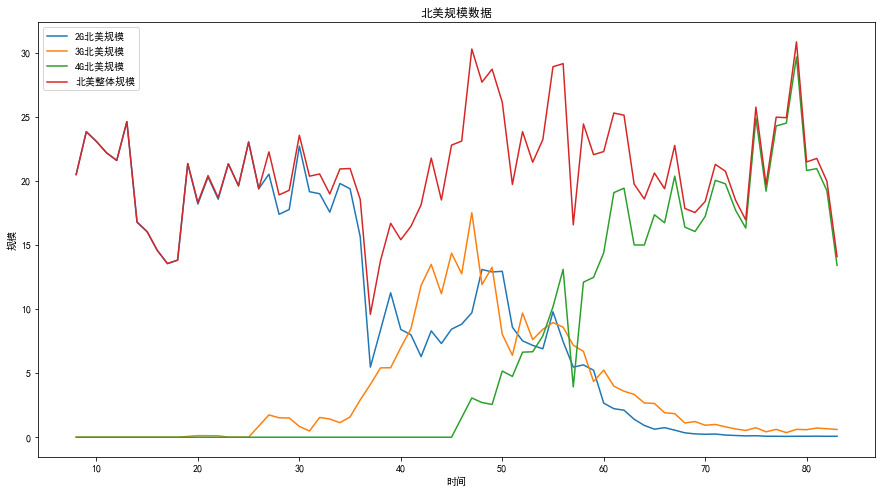

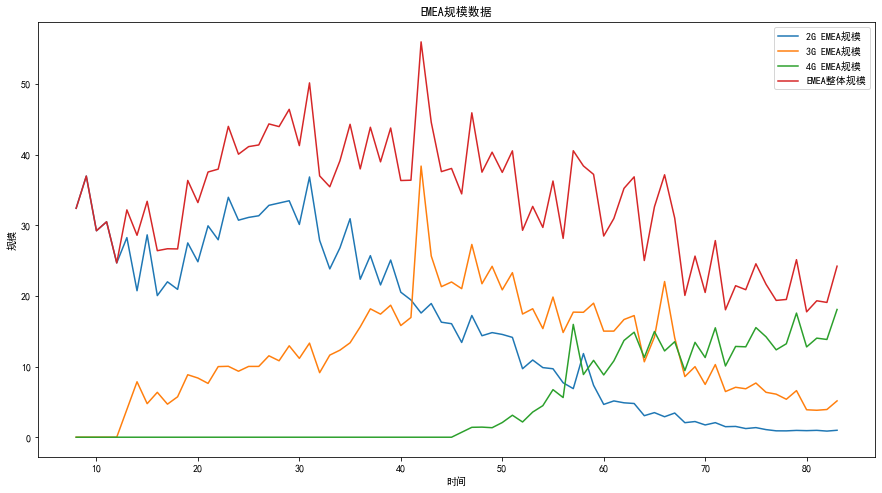

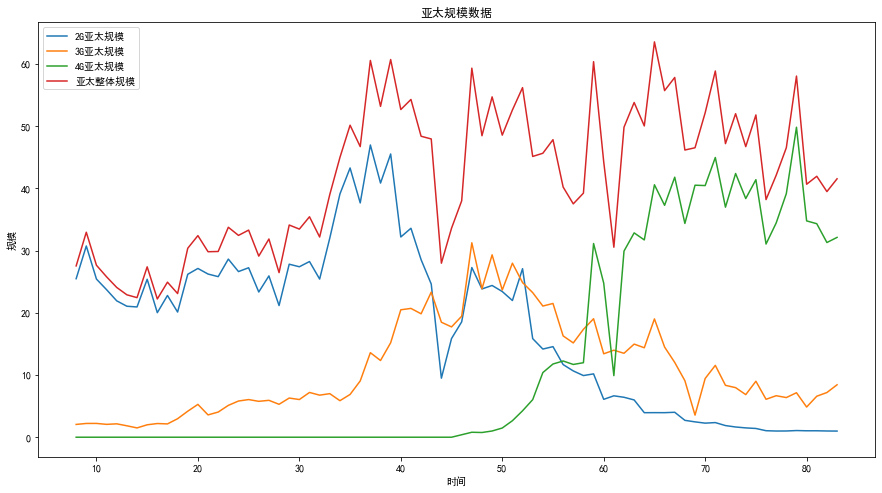

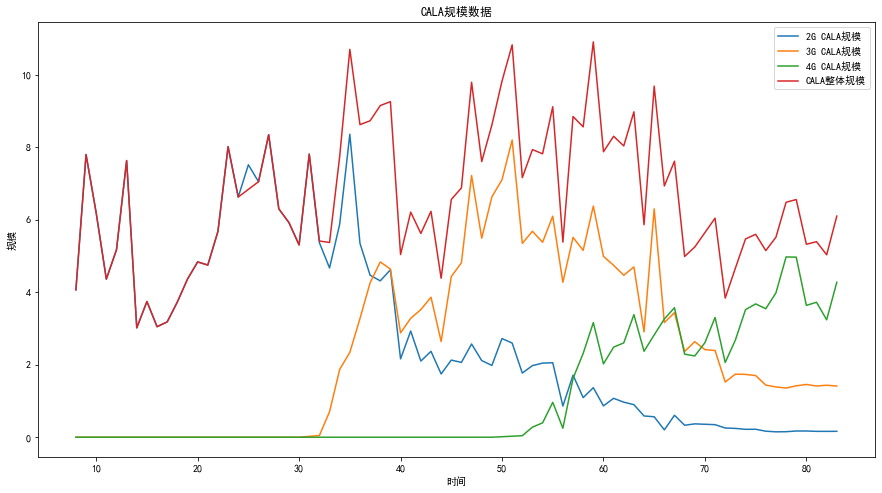

In [3]:
plt.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus']=False
    
plt.title("北美规模数据")
plt.xlabel("时间")
plt.ylabel("规模")
columns_dict["2G北美规模"].plot(legend=True, figsize=(15,8))
columns_dict["3G北美规模"].plot(legend=True)
columns_dict["4G北美规模"].plot(legend=True)
columns_dict["北美整体规模"].plot(legend=True)
plt.show()

plt.title("EMEA规模数据")
plt.xlabel("时间")
plt.ylabel("规模")
columns_dict["2G EMEA规模"].plot(legend=True, figsize=(15,8))
columns_dict["3G EMEA规模"].plot(legend=True)
columns_dict["4G EMEA规模"].plot(legend=True)
columns_dict["EMEA整体规模"].plot(legend=True)
plt.show()

plt.title("亚太规模数据")
plt.xlabel("时间")
plt.ylabel("规模")
columns_dict["2G亚太规模"].plot(legend=True, figsize=(15,8))
columns_dict["3G亚太规模"].plot(legend=True)
columns_dict["4G亚太规模"].plot(legend=True)
columns_dict["亚太整体规模"].plot(legend=True)
plt.show()

plt.title("CALA规模数据")
plt.xlabel("时间")
plt.ylabel("规模")
columns_dict["2G CALA规模"].plot(legend=True, figsize=(15,8))
columns_dict["3G CALA规模"].plot(legend=True)
columns_dict["4G CALA规模"].plot(legend=True)
columns_dict["CALA整体规模"].plot(legend=True)
plt.show()

## FCN Training and Evaluation

In [60]:
'''
Initialize FCN.
NOTE: 用上一季度的2g和3g的数据来训练模型预测当前季度的4g规模，如果可行，再用上一季度的3g和4g的数据来预测当前季度的5g规模。
同理，用上个季度的2g，3g，4g的数据训练模型预测总规模，预测结果加上当前季度预测的5g规模即是当前季度的总规模。
'''
NA_4g_model = nn.fcn(model_name = "NA_4g_model", num_inputs=2)
EMEA_4g_model = nn.fcn(model_name = "EMEA_4g_model", num_inputs=2)
AP_4g_model = nn.fcn(model_name = "AP_4g_model", num_inputs=2)
CALA_4g_model = nn.fcn(model_name = "CALA_4g_model", num_inputs=2)
models = [NA_4g_model, EMEA_4g_model, AP_4g_model, CALA_4g_model]

NA_total_model = nn.fcn(model_name = "NA_total_model", num_inputs=3)
EMEA_total_model = nn.fcn(model_name = "EMEA_total_model", num_inputs=3)
AP_total_model = nn.fcn(model_name = "AP_total_model", num_inputs=3)
CALA_total_model = nn.fcn(model_name = "CALA_total_model", num_inputs=3)
total_models = [NA_total_model, EMEA_total_model, AP_total_model]#, CALA_total_model]

In [61]:
# names: [2g,3g,4g]
def sample_training_set(names):
    indexes = np.random.randint(low=9, high=83 + 1, size=40)
    inputs = []
    targets = []
    for i in indexes:
        targets.append(columns_dict[names[2]][i])
        inputs.append([columns_dict[names[0]][i-1], columns_dict[names[1]][i-1]])
    return inputs, targets

def sample_total_training_set(names):
    indexes = np.random.randint(low=9, high=83 + 1, size=65)
    inputs = []
    targets = []
    for i in indexes:
        targets.append(columns_dict[names[3]][i])
        inputs.append([columns_dict[names[0]][i-1], columns_dict[names[1]][i-1], columns_dict[names[2]][i-1]])
    return inputs, targets

In [62]:
# train the network 300 epochs 
def train_nn(model, inputs, targets):
  model.train(inputs, targets, 200)

names_list = ["NA", "EMEA", "AP", "CALA"]
# for i in range(len(models)):
#   for j in range(100):
#     inputs, targets = sample_training_set(column_names[names_list[i]])
#     train_nn(models[i], inputs, targets)

# for j in range(100):
#   inputs, targets = sample_training_set(column_names[names_list[2]])
#   train_nn(models[2], inputs, targets)

# for i in range(len(total_models)):
#   for j in range(200):
#     inputs, targets = sample_total_training_set(column_names[names_list[i]])
#     train_nn(total_models[i], inputs, targets)

# for j in range(100):
#     inputs, targets = sample_total_training_set(column_names[names_list[2]])
#     train_nn(total_models[2], inputs, targets)

EPOCH 1 2536.582072
EPOCH 41 1788.740885
EPOCH 81 1349.870463
EPOCH 121 1071.054382
EPOCH 161 813.120290
EPOCH 1 599.717387
EPOCH 41 438.960831
EPOCH 81 297.560870
EPOCH 121 246.353836
EPOCH 161 195.381643
EPOCH 1 138.510832
EPOCH 41 110.436619
EPOCH 81 99.386255
EPOCH 121 77.359819
EPOCH 161 61.067498
EPOCH 1 68.498808
EPOCH 41 57.967704
EPOCH 81 41.265492
EPOCH 121 31.189314
EPOCH 161 28.230106
EPOCH 1 42.092107
EPOCH 41 12.228103
EPOCH 81 11.921395
EPOCH 121 11.036570
EPOCH 161 10.276533
EPOCH 1 53.290779
EPOCH 41 19.355254
EPOCH 81 20.526746
EPOCH 121 20.198436
EPOCH 161 16.636334
EPOCH 1 31.154800
EPOCH 41 16.681864
EPOCH 81 15.448226
EPOCH 121 14.909825
EPOCH 161 13.620246
EPOCH 1 31.802896
EPOCH 41 14.845889
EPOCH 81 13.834685
EPOCH 121 13.665394
EPOCH 161 12.411578
EPOCH 1 31.890490
EPOCH 41 13.601125
EPOCH 81 12.260187
EPOCH 121 8.084401
EPOCH 161 6.442757
EPOCH 1 26.919270
EPOCH 41 16.624049
EPOCH 81 16.086526
EPOCH 121 14.433903
EPOCH 161 13.926430
EPOCH 1 18.514006
EPOCH 41

WITHIN 1 264/300 times
MEDIAN ERROR 0.0004


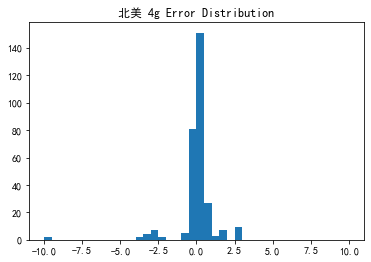

In [7]:
'''
Evaluate the model for it's performance.
'''
TEST = 300
correct = 0
tol = 1
errors = []

for i in range(TEST):
    print(f"TESTING {i + 1}/{TEST}", end = "\r")
    index = np.random.randint(low=9, high=83 + 1)
    target = columns_dict["4G北美规模"][index]
    inp = [columns_dict["2G北美规模"][index-1], columns_dict["3G北美规模"][index-1]]
    out = NA_4g_model.predict(inp)

    if (abs(out - target) < tol):
        correct += 1
    errors.append(out - target)
print(f"WITHIN {tol} {correct}/{TEST} times")
print(f"MEDIAN ERROR {np.median(np.abs(errors)):.4f}")

plt.title("北美 4g Error Distribution")
plt.hist(errors, bins = 40, range = (-10, 10))
plt.show()

WITHIN 1 218/300 times
MEDIAN ERROR 0.2410


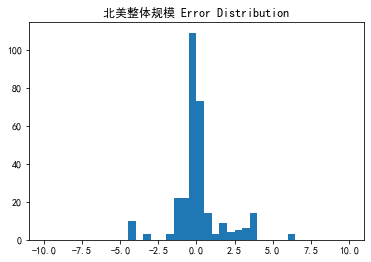

In [8]:
'''
Evaluate the model for it's performance.
'''
TEST = 300
correct = 0
tol = 1
errors = []

for i in range(TEST):
    print(f"TESTING {i + 1}/{TEST}", end = "\r")
    index = np.random.randint(low=9, high=83 + 1)
    target = columns_dict["北美整体规模"][index]
    inp = [columns_dict["2G北美规模"][index-1], columns_dict["3G北美规模"][index-1], columns_dict["4G北美规模"][index-1]]
    out = NA_total_model.predict(inp)

    if (abs(out - target) < tol):
        correct += 1
    errors.append(out - target)
print(f"WITHIN {tol} {correct}/{TEST} times")
print(f"MEDIAN ERROR {np.median(np.abs(errors)):.4f}")

plt.title("北美整体规模 Error Distribution")
plt.hist(errors, bins = 40, range = (-10, 10))
plt.show()

WITHIN 1 275/300 times
MEDIAN ERROR 0.0134


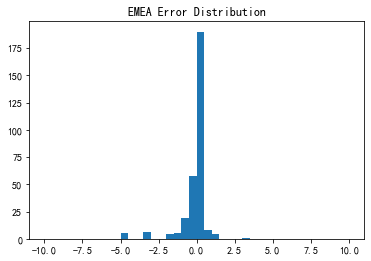

In [9]:
'''
Evaluate the model for it's performance.
'''
TEST = 300
correct = 0
tol = 1
errors = []

for i in range(TEST):
    print(f"TESTING {i + 1}/{TEST}", end = "\r")
    index = np.random.randint(low=9, high=83 + 1)
    target = columns_dict["4G EMEA规模"][index]
    inp = [columns_dict["2G EMEA规模"][index-1], columns_dict["3G EMEA规模"][index-1]]
    out = EMEA_4g_model.predict(inp)

    if (abs(out - target) < tol):
        correct += 1
    errors.append(out - target)
print(f"WITHIN {tol} {correct}/{TEST} times")
print(f"MEDIAN ERROR {np.median(np.abs(errors)):.4f}")

plt.title("EMEA Error Distribution")
plt.hist(errors, bins = 40, range = (-10, 10))
plt.show()

WITHIN 1 185/300 times
MEDIAN ERROR 0.6264


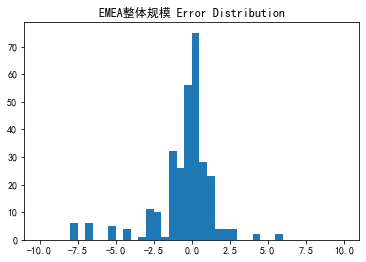

In [10]:
'''
Evaluate the model for it's performance.
'''
TEST = 300
correct = 0
tol = 1
errors = []

for i in range(TEST):
    print(f"TESTING {i + 1}/{TEST}", end = "\r")
    index = np.random.randint(low=9, high=83 + 1)
    target = columns_dict["EMEA整体规模"][index]
    inp = [columns_dict["2G EMEA规模"][index-1], columns_dict["3G EMEA规模"][index-1], columns_dict["4G EMEA规模"][index-1]]
    out = EMEA_total_model.predict(inp)

    if (abs(out - target) < tol):
        correct += 1
    errors.append(out - target)
print(f"WITHIN {tol} {correct}/{TEST} times")
print(f"MEDIAN ERROR {np.median(np.abs(errors)):.4f}")

plt.title("EMEA整体规模 Error Distribution")
plt.hist(errors, bins = 40, range = (-10, 10))
plt.show()

WITHIN 1 240/300 times
MEDIAN ERROR 0.0122


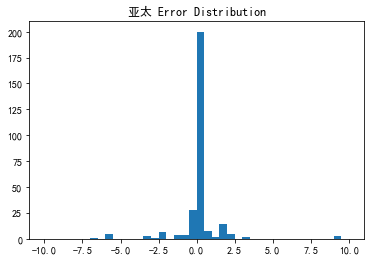

In [20]:
'''
Evaluate the model for it's performance.
'''
TEST = 300
correct = 0
tol = 1
errors = []

for i in range(TEST):
    print(f"TESTING {i + 1}/{TEST}", end = "\r")
    index = np.random.randint(low=9, high=83 + 1)
    target = columns_dict["4G亚太规模"][index]
    inp = [columns_dict["2G亚太规模"][index-1], columns_dict["3G亚太规模"][index-1]]
    out = AP_4g_model.predict(inp)

    if (abs(out - target) < tol):
        correct += 1
    errors.append(out - target)
print(f"WITHIN {tol} {correct}/{TEST} times")
print(f"MEDIAN ERROR {np.median(np.abs(errors)):.4f}")

plt.title("亚太 Error Distribution")
plt.hist(errors, bins = 40, range = (-10, 10))
plt.show()

WITHIN 1 217/300 times
MEDIAN ERROR 0.3716


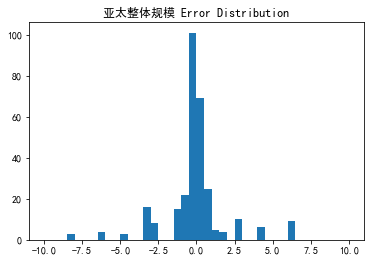

In [63]:
'''
Evaluate the model for it's performance.
'''
TEST = 300
correct = 0
tol = 1
errors = []

for i in range(TEST):
    print(f"TESTING {i + 1}/{TEST}", end = "\r")
    index = np.random.randint(low=9, high=83 + 1)
    target = columns_dict["亚太整体规模"][index]
    inp = [columns_dict["2G亚太规模"][index-1], columns_dict["3G亚太规模"][index-1], columns_dict["4G亚太规模"][index-1]]
    out = AP_total_model.predict(inp)

    if (abs(out - target) < tol):
        correct += 1
    errors.append(out - target)
print(f"WITHIN {tol} {correct}/{TEST} times")
print(f"MEDIAN ERROR {np.median(np.abs(errors)):.4f}")

plt.title("亚太整体规模 Error Distribution")
plt.hist(errors, bins = 40, range = (-10, 10))
plt.show()

WITHIN 1 273/300 times
MEDIAN ERROR 0.0025


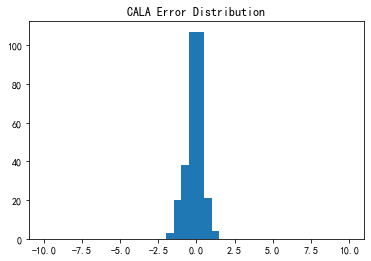

In [13]:
'''
Evaluate the model for it's performance.
'''
TEST = 300
correct = 0
tol = 1
errors = []

for i in range(TEST):
    print(f"TESTING {i + 1}/{TEST}", end = "\r")
    index = np.random.randint(low=9, high=83 + 1)
    target = columns_dict["4G CALA规模"][index]
    inp = [columns_dict["2G CALA规模"][index-1], columns_dict["3G CALA规模"][index-1]]
    out = CALA_4g_model.predict(inp)

    if (abs(out - target) < tol):
        correct += 1
    errors.append(out - target)
print(f"WITHIN {tol} {correct}/{TEST} times")
print(f"MEDIAN ERROR {np.median(np.abs(errors)):.4f}")

plt.title("CALA Error Distribution")
plt.hist(errors, bins = 40, range = (-10, 10))
plt.show()

WITHIN 1 260/300 times
MEDIAN ERROR 0.0800


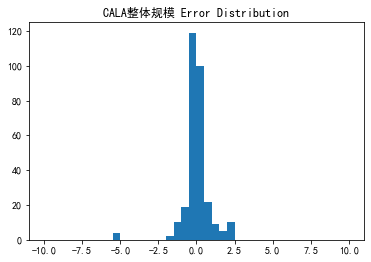

In [14]:
'''
Evaluate the model for it's performance.
'''
TEST = 300
correct = 0
tol = 1
errors = []

for i in range(TEST):
    print(f"TESTING {i + 1}/{TEST}", end = "\r")
    index = np.random.randint(low=9, high=83 + 1)
    target = columns_dict["CALA整体规模"][index]
    inp = [columns_dict["2G CALA规模"][index-1], columns_dict["3G CALA规模"][index-1], columns_dict["4G CALA规模"][index-1]]
    out = CALA_total_model.predict(inp)

    if (abs(out - target) < tol):
        correct += 1
    errors.append(out - target)
print(f"WITHIN {tol} {correct}/{TEST} times")
print(f"MEDIAN ERROR {np.median(np.abs(errors)):.4f}")

plt.title("CALA整体规模 Error Distribution")
plt.hist(errors, bins = 40, range = (-10, 10))
plt.show()

### 用2019年第四季度的3g和4g数据估算2020年第一季度的5g数据

In [15]:
print(max(0,NA_4g_model.predict([0.607,13.407])))
print(max(0,EMEA_4g_model.predict([5.144,18.083])))
print(max(0,AP_4g_model.predict([8.428,32.116])))
print(max(0,CALA_4g_model.predict([1.412,4.275])))

13.454306
11.040092
38.334957
4.300374


In [16]:
print(max(0,NA_total_model.predict([0.075, 0.607, 13.407])))
print(max(0,EMEA_total_model.predict([0.984,5.144,18.083])))
print(max(0,AP_total_model.predict([0.987,8.428,32.116])))
print(max(0,CALA_total_model.predict([0.163,1.412,4.275])))

19.844252
21.089989
40.054058
5.364025
